---
layout: post
title: Legendre transformations
description: "not just algebraic manipulations, let's see their geometric meaning"
date: 2026-01-31
author: Yair Mau
toc: true
format:
  html:
    code-fold: true
    code-summary: "Show the code"
# categories: [projects]
---

Inspired by Dan Kosakowski's youtube video, [A Simple yet Powerful Math Trick ](https://youtu.be/P2HZelQm7Lw?si=vBaUeWywBtDsBIZq){target="_blank"}.  
Folow his youtube channel, [Abide by Reason](https://www.youtube.com/@AbideByReason){target="_blank"}, it's very good.

useful sources:

* [Legendre transforms by Mark Alford](https://web.physics.wustl.edu/alford/physics/Legendre_introduction.pdf), read caption of figure 2
* [Legendre Transforms for Dummies, by Carl E. Mungan](https://www.aapt.org/docdirectory/meetingpresentations/sm14/mungan-poster.pdf). figure 1 is very good. The discussion in section "Inverse Legendre transform" is insightful, see especially Equation 14.
* [The Legendre Transform, by David Glickenstein](https://math.arizona.edu/~glickenstein/tex/legendre.pdf) involution

## motivation

It is hard to give good motivations for the Legendre transform without goint into the physics of thermodynamics or classical mechanics. I'll do that in another post. I'll try to give here a mathematical motivation, which is to say, let's clearly state what is the problem we would like to solve.

Suppose we have a function $f(x)$. We can compute its derivative $u = \frac{df}{dx}$. Can we express **the same information** contained in $f(x)$ through a new function $g(u)$? What do I mean by "the same information"?

**Involution**  
Starting from $f(x)$, we compute $g(u)$ with a given procedure (to be found below). Applying **the same procedure** to $g(u)$ gives us back $f(x)$. $f(x)$ and $g(u)$ are but the sides of the same coin. By flipping the coin twice, we get back to where we started. This is what involution means.

**Conjugate variable swap**  
The independent variable of $g$ is $u$, and it is defined as the derivative $df/dx$. The independent variable of $f$ is $x$, and it is defined as the derivative $dg/du$. So the roles of dependent and independent variables are swapped, but in a very specific way.

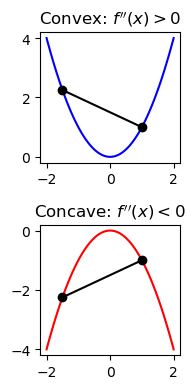

In [114]:
#| label: fig-convex-concave
#| fig-cap: "Comparison of Convex and Concave functions."
#| column: margin
#| echo: false

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 100)
f_convex = lambda x: x**2
f_concave = lambda x: -x**2

fig, ax = plt.subplots(2, 1, figsize=(2, 4))

ax[0].plot(x, f_convex(x), 'b-')
ax[0].set_title("Convex: $f''(x) > 0$")
ax[0].plot([-1.5, 1], [f_convex(-1.5), f_convex(1)], 'ko-', label='Chord')

ax[1].plot(x, f_concave(x), 'r-')
ax[1].set_title("Concave: $f''(x) < 0$")
ax[1].plot([-1.5, 1], [f_concave(-1.5), f_concave(1)], 'ko-', label='Chord')


plt.tight_layout()

**Uniqueness**  
The original function $f(x)$ **has to be convex** (or concave) for the Legendre transform to be defined. Convexity (concavity) means that the second derivative is positive (negative). A geometric way to understand convexity is that if we draw a line between any two points of the graph of $f(x)$, the line lies always above (or below) the graph. If this requirement is not satisfied, the mapping between $x$ and $u$ is no longer one-to-one, meaning we can no longer uniquely reconstruct the original function $f(x)$ from $g(u)$.

The challenge, then, is to find a mathematical operation that satisfies all three criteria: it must be an involution, it must swap the variable with the derivative, and it must rely on the unique curvature of the function.

## a practical example that doesn't work

I'm following here Dan Kosakowski's arguments, from his youtube video, [A Simple yet Powerful Math Trick ](https://youtu.be/P2HZelQm7Lw?si=vBaUeWywBtDsBIZq){target="_blank"}.

We start with a function $f(x)$. For this practical example we'll choose a parabola. In panel **a** below, we plot the function

$$
f(x) = x^2.
$$

We then define the slope of the function as

$$
u = \frac{df}{dx}.
$$

Panel **b** shows that if we draw tangent lines to $f(x)$, them make a nice envelope of the function itself, and that is a clue that maybe we can describe the function $f$ in terms of $u$ instead of $x$.

In [115]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt

In [132]:
#| code-summary: "define useful functions"
def f(x):
    return x**2
def f_inverse(u):
    return (u/2)**2
def f2(x):
    return (x - 1)**2

def f_prime(x):
    return 2 * x
def f_prime2(x):
    return 2 * (x - 1)

def tangent_line(x, x0):
    return f_prime(x0) * (x - x0) + f(x0)
def tangent_line2(x, x0):
    return f_prime2(x0) * (x - x0) + f2(x0)

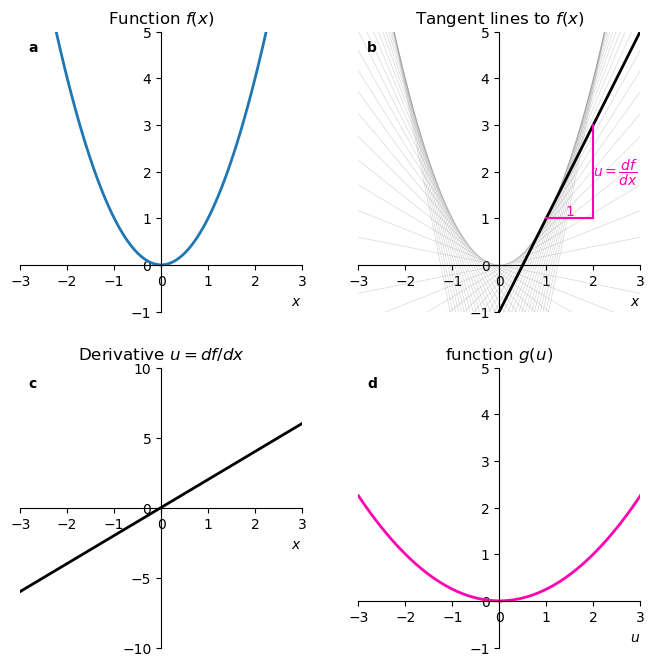

In [133]:
#| code-summary: "plot"
fig, axx = plt.subplots(2, 2, figsize=(8,8))

ax = axx.flatten()
x = np.linspace(-3, 3, 100)

ax[0].plot(x, f(x), label='$f(x) = x^2$', color='tab:blue', lw=2)

x0_values = np.arange(-2.5, 2.6, 0.1)
for x0 in x0_values:
    ax[1].plot(x, tangent_line(x, x0), color='gray', alpha=0.3, lw=0.5)
ax[1].plot(x, tangent_line(x, 1), color='black', lw=2)
x1, x2 = 1, 2
y1, y2 = tangent_line(x1, 1), tangent_line(x2, 1)
ax[1].plot([x1, x2], [y1, y1], color='xkcd:bright pink')
ax[1].plot([x2, x2], [y1, y2], color='xkcd:bright pink')
ax[1].text(x1+(x2-x1)/2, f(x1), '1', va='bottom', ha='center', color='xkcd:bright pink')
ax[1].text(x2, y1 + (y2-y1)/2,
           r'$u=\dfrac{df}{dx}$', va='center', ha='left', color='xkcd:bright pink')

for axis in ax[[0,1]]:
    axis.spines['left'].set_position('zero')
    axis.spines['bottom'].set_position('zero')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set(xlim=(x[0], x[-1]),
             ylim=(-1, 5),
             xticks=np.arange(-3, 4, 1),
             yticks=np.arange(-1, 6, 1)
             )
    axis.set_xlabel('$x$', loc='right')

ax[0].set_title('Function $f(x)$')
ax[0].set_xlabel('$x$', loc='right')
ax[1].set_title('Tangent lines to $f(x)$')
# ax[1].set_xlabel('$x$')

ax[2].plot(x, f_prime(x), label=r"$f'(x) = 2x$", color='black', lw=2)
ax[2].spines['left'].set_position('zero')
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set(xlim=(x[0], x[-1]),
            ylim=(-10, 10),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-10, 11, 5),
            title="Derivative $u=df/dx$"
            )
ax[2].set_xlabel('$x$', loc='right')

u = np.linspace(-3, 3, 100)
ax[3].plot(u, f_inverse(u), label=r"$g(u) = \left(\frac{u}{2}\right)^2$", color='xkcd:bright pink', lw=2)
ax[3].spines['left'].set_position('zero')
ax[3].spines['bottom'].set_position('zero')
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].set(xlim=(u[0], u[-1]),
            ylim=(-1, 5),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-1, 6, 1),
            title="function $g(u)$",
            )
ax[3].set_xlabel('$u$', loc='right');

ax[0].text(0.03, 0.97, r"a", transform=ax[0].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[1].text(0.03, 0.97, r"b", transform=ax[1].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[2].text(0.03, 0.97, r"c", transform=ax[2].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[3].text(0.03, 0.97, r"d", transform=ax[3].transAxes, 
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold");

Differentiating $x^2$ gives us a relation between $u$ and $x$:

$$
u(x) = 2x,
$$

which can be seen in panel **c**.

Because this is a one-to-one relation, that is, for each $x$ there is a unique $u$ and vice versa, we can invert this relation to express $x$ in terms of $u$:

$$
x(u) = \frac{u}{2}
$$

We need now a function $g(u)$. A first guess of what $g(u)$ could be is:

$$
g(u) = f(x(u)) = \left(\frac{u}{2}\right)^2 = \frac{u^2}{4}.
$$

This last function is plotted in panel **d**.

Alas, our choice for the procedure $g(u) = f(x(u))$ is not a good one. To see why, we can try doing the procedure again, this time on a right-shifted version of $f$:

$$
f_2(x) = (x - a)^2.
$$

The derivative of this new function defines $u$:

\begin{align*}
u &= \frac{df_2}{dx} \\
& = \frac{d}{dx} (x - a)^2 \\
& = 2(x-a).
\end{align*}

Expressing now $x$ in terms of $u$ gives

$$
x(u) = \frac{u}{2} + a.
$$

Finally, we substitute $x(u)$ back into $f_2$ to get

\begin{align*}
g_2(u) &= f_2(x(u)) \\
&= (x(u) - a)^2 \\
&= \left(\frac{u}{2} + a - a\right)^2 \\
&= \frac{u^2}{4}.
\end{align*}

This is exactly the same function we had before shifting the original function!
We completely lost the information that the parabola was shifted. See panel **d** below, it is identical to panel **d** in the previous example.

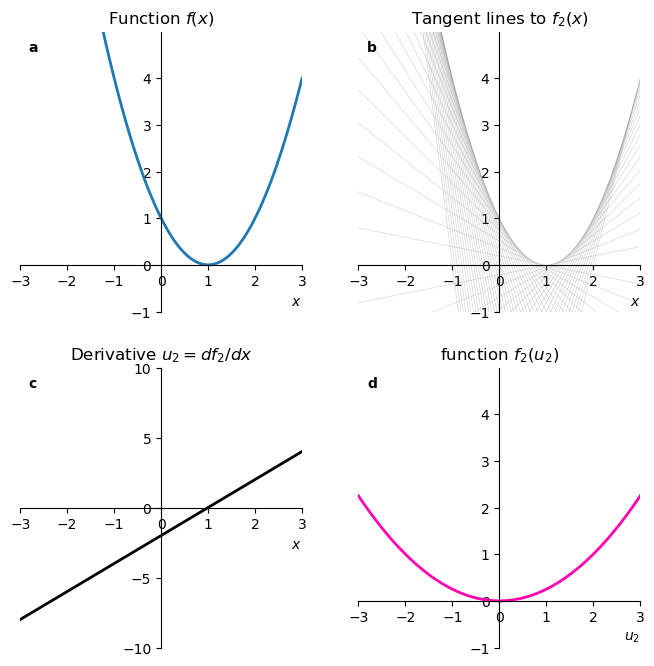

In [135]:
#| code-summary: "plot"
fig, axx = plt.subplots(2, 2, figsize=(8,8))

ax = axx.flatten()
x = np.linspace(-3, 3, 100)

ax[0].plot(x, f2(x), label='$f_2(x) = \cosh(x - 1)$', color='tab:blue', lw=2)

x0_values = np.arange(x[0], x[-1]+0.1, 0.1)
for x0 in x0_values:
    ax[1].plot(x, tangent_line2(x, x0), color='gray', alpha=0.3, lw=0.5)
# ax[1].plot(x, tangent_line2(x, 1), color='black', lw=2)
# x1, x2 = 1, 2
# y1, y2 = tangent_line2(x1, 1), tangent_line2(x2, 1)
# ax[1].plot([x1, x2], [y1, y1], color='xkcd:bright pink')
# ax[1].plot([x2, x2], [y1, y2], color='xkcd:bright pink')
# ax[1].text(x1+(x2-x1)/2, f2(x1), '1', va='bottom', ha='center', color='xkcd:bright pink')
# ax[1].text(x2, y1 + (y2-y1)/2,
#            r'$u=\dfrac{df}{dx}$', va='center', ha='left', color='xkcd:bright pink')

for axis in ax[[0,1]]:
    axis.spines['left'].set_position('zero')
    axis.spines['bottom'].set_position('zero')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set(xlim=(x[0], x[-1]),
             ylim=(-1, 5),
             xticks=np.arange(-3, 4, 1),
             yticks=np.arange(-1, 5, 1)
             )
    axis.set_xlabel('$x$', loc='right')

ax[0].set_title('Function $f(x)$')
ax[0].set_xlabel('$x$', loc='right')
ax[1].set_title('Tangent lines to $f_2(x)$')
# ax[1].set_xlabel('$x$')

ax[2].plot(x, f_prime2(x), label=r"$f'(x) = \sinh(x-1)$", color='black', lw=2)
ax[2].spines['left'].set_position('zero')
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set(xlim=(x[0], x[-1]),
            ylim=(-10, 10),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-10, 11, 5),
            title="Derivative $u_2=df_2/dx$"
            )
ax[2].set_xlabel('$x$', loc='right')

u = np.linspace(-3, 3, 100)
ax[3].plot(u, f_inverse(u), label=r"$f_2(x(u_2)) = \cosh(\sinh^{-1}(u_2))$", color='xkcd:bright pink', lw=2)
ax[3].spines['left'].set_position('zero')
ax[3].spines['bottom'].set_position('zero')
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].set(xlim=(u[0], u[-1]),
            ylim=(-1, 5),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-1, 5, 1),
            title="function $f_2(u_2)$",
            )
ax[3].set_xlabel('$u_2$', loc='right');

ax[0].text(0.03, 0.97, r"a", transform=ax[0].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[1].text(0.03, 0.97, r"b", transform=ax[1].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[2].text(0.03, 0.97, r"c", transform=ax[2].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[3].text(0.03, 0.97, r"d", transform=ax[3].transAxes, 
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold");

 Just for completeness, let's go back from $g_2(u)$ to $f_2(x)$:

\begin{align*}
x &= \frac{dg_2}{du} \\
&= \frac{d}{du} \left(\frac{u}{2}\right)^2 \\
&= \frac{u}{2},
\end{align*}

And now:

$$
f_2(x) = g_2(u(x)) = g_2(2x) = \left(\frac{2x}{2}\right)^2 = x^2,
$$

which is not the shifted parabola we started with.

## y-intercept, not slope

We learned that using the slope $u = df/dx$ to define a new function $g(u)=f(x(u))$ does not work. Instead, let's try using the y-intercept of the tangent line as our function $-g(u)$. The negative sign here will be justified later.
The general equation for the tangent line is

$$
y = mx - g.
$$

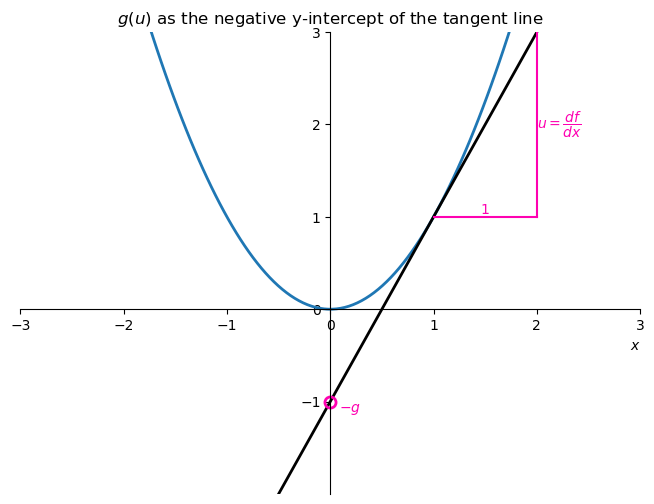

In [147]:
#| code-summary: "plot"
fig, ax = plt.subplots(figsize=(8,6))

x = np.linspace(-2, 2, 100)

ax.plot(x, f(x), label='$f(x) = \cosh(x)$', color='tab:blue', lw=2)

ax.plot(x, tangent_line(x, 1), color='black', lw=2)
x1, x2 = 1, 2
y1, y2 = tangent_line(x1, 1), tangent_line(x2, 1)
ax.plot([x1, x2], [y1, y1], color='xkcd:bright pink')
ax.plot([x2, x2], [y1, y2], color='xkcd:bright pink')
ax.plot([0,], [-1], ls='None', marker='o',
        mec='xkcd:bright pink', mfc="None", markersize=8, markeredgewidth=2)
ax.text(0.3, -1, r'$-g$', va='top', ha='right', color='xkcd:bright pink')
ax.text(x1+(x2-x1)/2, f(x1), '1', va='bottom', ha='center', color='xkcd:bright pink')
ax.text(x2, y1 + (y2-y1)/2,
        r'$u=\dfrac{df}{dx}$', va='center', ha='left', color='xkcd:bright pink')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlim=(x[0], x[-1]),
            ylim=(-2, 3),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-1, 4, 1),
            title=r"$g(u)$ as the negative y-intercept of the tangent line"
            )
ax.set_xlabel('$x$', loc='right');

The slope $m$ was already defined as $u = f'(x)$, so we have

$$
y = ux - g.
$$

The tangent line evaluated at $x_0$ touches the function at $f(x_0)$, so we can use that to find $g$:

\begin{align*}
f(x_0) &= ux_0 - g \\
g &= ux_0 - f(x_0).
\end{align*}

For a tangent line at a generic point $x$, we have that the intercept is

$$
g(u) = u\cdot x - f(x).
$$

Let's use the formula above to compute $g(u)$ for our shifted parabola $f(x) = (x-a)^2$.

\begin{align*}
u &= \frac{df}{dx} \\
&= \frac{d}{dx} (x-a)^2 \\
&= 2(x-a),
\end{align*}

which we can invert to get
$$
x(u) = \frac{u}{2} + a.
$$

Substituting into the formula for $g(u)$ gives

\begin{align*}
g(u) &= u \cdot x(u) - f(x(u)) \\
&= u \cdot \left(\frac{u}{2} + a\right) - \left(\frac{u}{2} + a - a\right)^2 \\
&= u \cdot \left(\frac{u}{2} + a\right) - \left(\frac{u}{2}\right)^2 \\
&= \frac{u^2}{2} + ua - \frac{u^2}{4} \\
&= \frac{u^2}{4} + ua.
\end{align*}

This function is different from the one we obtained before, and it contains the information about the shift $a$. Now let's try going back from $g(u)$ to $f(x)$.

\begin{align*}
x &= \frac{dg}{du} \\
&= \frac{d}{du} \left(\frac{u^2}{4} + ua\right) \\
&= \frac{u}{2} + a,
\end{align*}

Solving for $u$ gives $u = 2(x - a)$.

And now:
\begin{align*}
f(x) &= u\cdot x - g(u(x)) \\
&= 2(x - a) \cdot x - \left(\frac{(2(x - a))^2}{4} + 2(x - a)a\right) \\
&= 2(x - a) \cdot x - \left((x - a)^2 + 2a(x - a)\right) \\
&= 2(x - a) \cdot x - (x - a)^2 - 2a(x - a) \\
&= (x - a)^2.
\end{align*}

Success!

## derivation according to V.I. Arnold

> **Legendre transformations**  
  The Legendre transformation is a very useful mathematical tool: it transforms functions on a vector space to functions on the dual space. Legendre transformations are related to projective duality and tangential coordinates in algebraic geometry and the construction of dual Banach spaces in analysis. They are often encountered in physics (for example, in the definition of thermodynamic quantities).
>
> **Definition**  
  Let $y=f(x)$ be a convex function, $f''(x)>0$.  
  The *Legendre transformation* of the function $f$ is a new function $g$ of a new variable $p$, which is constructed in the following way (Figure 43). We draw the graph of $f$ in the $x,y$ plane. Let $p$ be a given number. Consider the straight line $y=px$. We take the point $x=x(p)$ at which the curve is farthest from the straight line in the vertical direction: for each $p$ the function $px-f(x)=F(p,x)$ has a maximum with respect to $x$ at the point $x(p)$. Now we define $g(p)=F(p,x(p))$.  
>  
>  The point $x(p)$ is defined by the extremal condition $\partial F/\partial x=0$, i.e., $f'(x)=p$. Since $f$ is convex, the point $x(p)$ is unique.
>
> **Involutivity**  
  Let us consider a function $f$ which is differentiable as many times as necessary, with $f''(x) > 0$. It is easy to verify that a Legendre transformation takes convex functions to convex functions. Therefore, we can apply it twice.
>    
> **Theorem.** The Legendre transformation is involutive, i.e., its square is the identity: if under the Legendre transformation $f$ is taken to $g$, then the Legendre transform of $g$ will again be $f$.  
>
> **Proof.** In order to apply the Legendre transform to $g$, with variable $p$, we must by definition look at a new independent variable (which we will call $x$), construct the function
  $$
  G(x, p) = xp - g(p),
  $$
  and find the point $p(x)$ at which $G$ attains its maximum: $\partial G/\partial p = 0$, i.e., $g'(p) = x$. Then the Legendre transform of $g(p)$ will be the function of $x$ equal to $G(x, p(x))$.    
>
>We will show that $G(x, p(x)) = f(x)$. To this end we notice that $G(x, p) = xp - q(p)$ has a simple geometric interpretation: it is the ordinate of the point with abscissa $x$ on the line tangent to the graph of $f(x)$ with slope $p$ (Figure 45). For fixed $p$, the function $G(x, p)$ is a linear function of $x$, with $\partial G/\partial x = p$, and for $x = x(p)$ we have $G(x, p) = xp - g(p) = f(x)$ by the definition of $g(p)$.  
>
>  Let us now fix $x = x_0$ and vary $p$. Then the values of $G(x,p)$ will be the ordinates of the points of intersection of the line $x=x_0$ with the line tangen to the graph of $f(x)$ with various slopes $p$. By the convexity of the graph it follows that all these tangents lie below the curve, and therefore the maximum of $G(x,p)$ for a fixed $x(p_0)$ is equal to $f(x)$ (and is achieed for $p=p(x_0)=f'(x_0)$).


::: {#interactive-container style="display: flex; flex-direction: column; align-items: center;"}

```{ojs}
//| echo: false

blue_color = "#0343df"
red_color = "#e50000"
light_blue_color = "#95d0fc"
// 1. Define the slider without a label to keep it tight
viewof p = Inputs.range([0, 4], {
  step: 0.1, 
  value: 2.5,
  width: 250
})

// 2. Create a centered row using a template literal
// This puts "Slope p" right next to the number box
html`<div style="display: flex; align-items: center; gap: 10px; font-weight: bold; font-family: sans-serif; margin-bottom: 15px;">
  <span>Slope p</span> ${viewof p}
</div>`

xo = p / 2

// 3. Define the plot
Plot.plot({
  grid: true,
  marginLeft: 60,
  marginBottom: 60,
  width: 600, 
  style: { fontSize: 14 },
  x: { domain: [0, 3], label: "x →", labelOffset: 45 },
  y: { domain: [-4, 8], label: "↑ y", labelOffset: 50 },
  marks: [
    Plot.axisX({fontSize: 20, fontWeight: "bold"}),
    Plot.axisY({fontSize: 20, fontWeight: "bold"}),

    // Parabola
    Plot.line(d3.range(0, 3.1, 0.1), {
      x: d => d,
      y: d => d ** 2,
      stroke: "black",
      strokeWidth: 4
    }),
    
    // Blue line
    Plot.line(d3.range(0, 3.1, 0.1), {
      x: d => d,
      y: d => p * d,
      stroke: blue_color,
      strokeWidth: 4
    }),

    // LIGHT Blue line
    Plot.link([null], {
      x1: 0, y1: -p * p / 4,
      x2: 3, y2: p*3 -p * p / 4,
      stroke: light_blue_color, strokeWidth: 2,
    }),

    // Red vertical segment
    Plot.link([null], {
      x1: p / 2, y1: (p ** 2) / 2,
      x2: p / 2, y2: (p ** 2) / 4,
      stroke: red_color, strokeWidth: 5
    }),

    // The gray thick straight line (Vertical segment)
    Plot.link([null], {
      x1: p / 2, y1: 0,
      x2: p / 2, y2: (p ** 2) / 4,
      stroke: "gray", strokeWidth: 5
    }),

    Plot.ruleY([0], {
      stroke: "#aaa",    // A light gray color
      strokeWidth: 2,    // Makes it "thin"
      strokeOpacity: 0.5 // Makes it subtle
    }),

    // TEXT LABELS
    Plot.text([null], {
      x: 2.7, y: 8, 
      text: ["f(x)"], 
      fontSize: 20, fontWeight: "bold", dy: -10 
    }),

    Plot.text([null], {
      x: 2, y: 2 * p, 
      text: ["px"], 
      fontSize: 20, fill: blue_color, textAnchor: "start", dx: 0, dy: 10 
    }),

    Plot.text([null], {
      x: p / 2, y: (p ** 2) * 3 / 8, 
      text: ["g(p)"], 
      fontSize: 15, fill: red_color, fontWeight: "bold", dy: 0, dx: 20 
    }),

    Plot.text([null], {
      x: p / 2, y: (p ** 2) * 1 / 8, 
      text: ["f(x)"], 
      fontSize: 15, fill: "black", fontWeight: "bold", dy: 0, dx: 20 
    }),

    Plot.text([null], {
      x: p / 2, y: 0, 
      text: ["x(p)"], 
      fontSize: 16, fontWeight: "bold", dx: 0, dy: 10, fill: "black", 
    }),
  ]
})
```

::: {#interactive-container style="display: flex; flex-direction: column; align-items: center;"}

```{ojs}
//| echo: false

// 1. Define the slider without a label to keep it tight
viewof x0 = Inputs.range([0, 3], {
  step: 0.1, 
  value: 2.5,
  width: 250
})

// 2. Create a centered row using a template literal
// This puts "Slope p" right next to the number box
html`<div style="display: flex; align-items: center; gap: 10px; font-weight: bold; font-family: sans-serif; margin-bottom: 15px;">
  <span>x₀</span> ${viewof x0}
</div>`

u = 2 * x0
g = u * x0 - (x0 ** 2)

// 3. Define the plot
Plot.plot({
  grid: true,
  marginLeft: 60,
  marginBottom: 60,
  width: 600, 
  style: { fontSize: 14 },
  x: { domain: [0, 3], label: "x →", labelOffset: 45 },
  y: { domain: [-8, 8], label: "↑ y", labelOffset: 50 },
  marks: [
    Plot.axisX({fontSize: 20, fontWeight: "bold"}),
    Plot.axisY({fontSize: 20, fontWeight: "bold"}),

    // Parabola
    Plot.line(d3.range(0, 3.1, 0.1), {
      x: d => d,
      y: d => d ** 2,
      stroke: "black",
      strokeWidth: 4
    }),
    
    // Blue line
    Plot.link([null], {
      x1: 0, y1: -g,
      x2: 3, y2: 3*u - g,
      stroke: blue_color, strokeWidth: 5
    }),

    // Red vertical segment
    Plot.link([null], {
      x1: 0, y1: 0,
      x2: 0, y2: -g,
      stroke: red_color, strokeWidth: 5
    }),

    // black dashed vertical segment
    Plot.link([null], {
      x1: x0, y1: 0,
      x2: x0, y2: x0 ** 2,
      stroke: "black", strokeWidth: 2, strokeDasharray: "4 4"
    }),

    Plot.dot([null], {
      x: x0, 
      y: x0 ** 2, 
      r: 8,            // Radius of the dot
      fill: red_color,   // Color of the dot
      stroke: "white", // Optional: adds an outline to make it pop
      strokeWidth: 2
    }),

    Plot.ruleY([0], {
      stroke: "#aaa",    // A light gray color
      strokeWidth: 2,    // Makes it "thin"
      strokeOpacity: 0.5 // Makes it subtle
    }),

    // TEXT LABELS
    Plot.text([null], {
      x: 2.7, y: 8, 
      text: ["f(x)"], 
      fontSize: 20, fontWeight: "bold", dy: -10 
    }),

    Plot.text([null], {
      x: 0, y: -g/2, 
      text: ["g(x₀)"], 
      fontSize: 16, fontWeight: "bold", dx: 30, fill: red_color, 
    }),

    Plot.text([null], {
      x: x0, y: 0, 
      text: ["x₀"], 
      fontSize: 16, fontWeight: "bold", dx: 0, dy: 10, fill: "black", 
    }),

  ]
})
```